## KNN

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [10]:
sns.__version__

'0.10.1'

In [12]:
breast_cancer = load_breast_cancer()

sklearn.utils.Bunch

In [ ]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

<ipython-input-23-52466d8b3ccf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [24]:
y_pred = knn.predict(X_test)

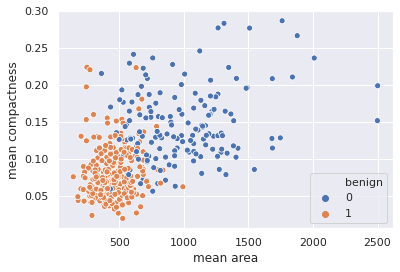

In [21]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_train.join(y_train, how='outer')
)

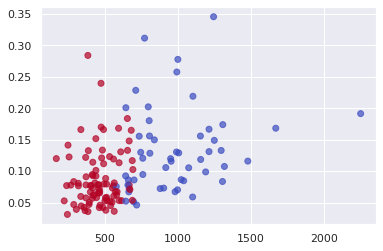

In [20]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [22]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])